In [29]:
using Plots
gr(size=(600,400))
nothing

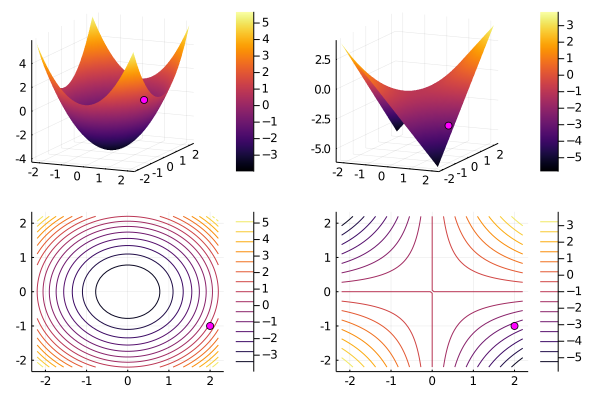

In [18]:
f1(x, y) = x^2 + y^2 - 4
f2(x, y) = x * y - 1

a,b = 2.0, -1.0
p = plot(layout = (2, 2), leg=true)

xg = range(-2.2, 2.2, length=50)
yg = range(-2.2, 2.2, length=50)

surface!(p[1,1], xg, yg, f1)
surface!(p[1,2], xg, yg, f2)
contour!(p[2,1], xg, yg, f1)
contour!(p[2,2], xg, yg, f2)
scatter!(p[1,1], [a], [b], [f1(a,b)], c=:magenta, leg=false)
scatter!(p[1,2], [a], [b], [f2(a,b)], c=:magenta, leg=false)
scatter!(p[2,1], [a], [b], c=:magenta, leg=false)
scatter!(p[2,2], [a], [b], c=:magenta, leg=false)

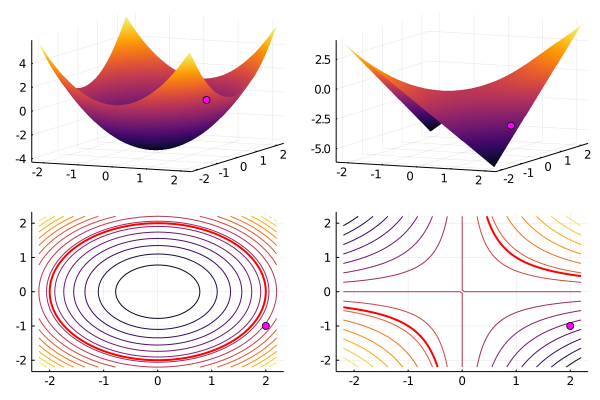

In [19]:
p = plot(layout = (2, 2), leg=false)

xg = range(-2.2, 2.2, length=50)
yg = range(-2.2, 2.2, length=50)

surface!(p[1,1], xg, yg, f1)
surface!(p[1,2], xg, yg, f2)
contour!(p[2,1], xg, yg, f1)
contour!(p[2,2], xg, yg, f2)
contour!(p[2,1], xg, yg, f1, levels=[0.0], lw=2, c=:red)
contour!(p[2,2], xg, yg, f2, levels=[0.0], lw=2, c=:red)
scatter!(p[1,1], [a], [b], [f1(a,b)], c=:magenta, leg=false)
scatter!(p[1,2], [a], [b], [f2(a,b)], c=:magenta, leg=false)
scatter!(p[2,1], [a], [b], c=:magenta, leg=false)
scatter!(p[2,2], [a], [b], c=:magenta, leg=false)

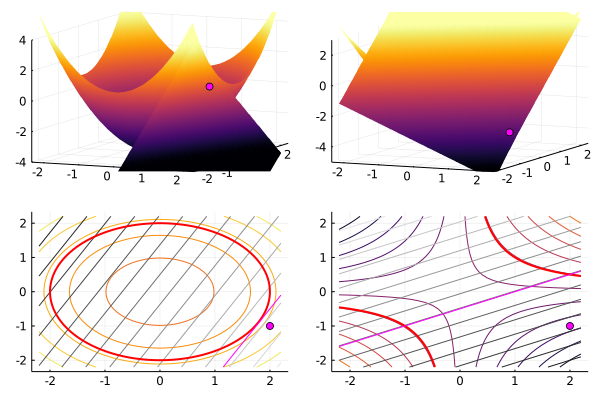

In [44]:
using ForwardDiff, LinearAlgebra

p = plot(layout = (2, 2), leg=false)

xg = range(-2.2, 2.2, length=50)
yg = range(-2.2, 2.2, length=50)

∇f1(x, y) = ForwardDiff.gradient(x -> f1(x...), [x; y])
∇f2(x, y) = ForwardDiff.gradient(x -> f2(x...), [x; y])
L1(x, y, a, b) = f1(a,b) + dot(∇f1(a, b), [x - a; y - b])
L2(x, y, a, b) = f2(a,b) + dot(∇f2(a, b), [x - a; y - b])

surface!(p[1,1], xg, yg, f1)
surface!(p[1,1], xg, yg, (x,y) -> L1(x, y, a, b))
zlims!(p[1,1], -4, 4)
surface!(p[1,2], xg, yg, f2)
surface!(p[1,2], xg, yg, (x,y) -> L2(x, y, a, b))
zlims!(p[1,2], -5, 3)

contour!(p[2,1], xg, yg, f1)
contour!(p[2,1], xg, yg, (x,y) -> L1(x, y, a, b), c=:grays)
contour!(p[2,2], xg, yg, f2)
contour!(p[2,2], xg, yg, (x,y) -> L2(x, y, a, b), c=:grays)
contour!(p[2,1], xg, yg, f1, levels=[0.0], lw=2, c=:red)
contour!(p[2,1], xg, yg, (x,y) -> L1(x, y, a, b), levels=[0.0], c=:magenta)
contour!(p[2,2], xg, yg, f2, levels=[0.0], lw=2, c=:red)
contour!(p[2,2], xg, yg, (x,y) -> L2(x, y, a, b), levels=[0.0], c=:magenta)
scatter!(p[1,1], [a], [b], [f1(a,b)], c=:magenta, leg=false)
scatter!(p[1,2], [a], [b], [f2(a,b)], c=:magenta, leg=false)
scatter!(p[2,1], [a], [b], c=:magenta, leg=false)
scatter!(p[2,2], [a], [b], c=:magenta, leg=false)

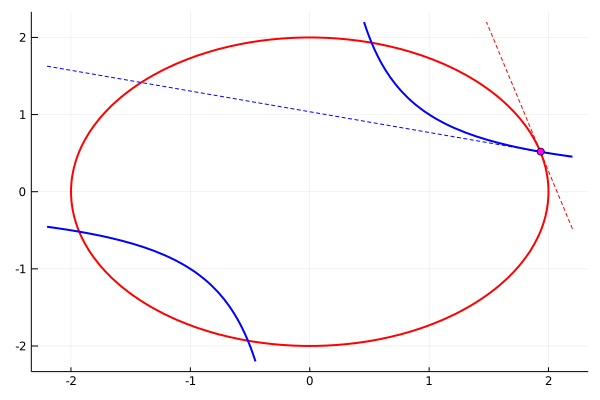

In [62]:
p = plot(leg=false)
contour!(xg, yg, f1, levels=[0.0], lw=2, c=:red)
contour!(xg, yg, f2, levels=[0.0], lw=2, c=:blue)
contour!(xg, yg, (x,y) -> L1(x, y, a, b), levels=[0.0], c=:red, l=:dash)
contour!(xg, yg, (x,y) -> L2(x, y, a, b), levels=[0.0], c=:blue, l=:dash)
scatter!([a], [b], c=:magenta, leg=false)

In [48]:
J(x, y) = [∇f1(x, y)'; ∇f2(x, y)']

J(a, b)

2×2 Array{Float64,2}:
  4.0  -2.0
 -1.0   2.0

In [50]:
F(x, y) = [f1(x, y); f2(x, y)]

F(a, b)

2-element Array{Float64,1}:
  1.0
 -3.0

In [59]:
d = J(a, b) \ (-F(a, b))

2-element Array{Float64,1}:
 -0.10000463964549383
 -0.052881857419085174

In [60]:
a = a + d[1]
b = b + d[2]

0.5196289650917375

In [61]:
a, b

(1.9346273949865405, 0.5196289650917375)

## Fractal de Newton

In [63]:
f(z) = z^3 - 1

f (generic function with 1 method)

In [64]:
f(1)

0

In [65]:
f(-1 / 2 + sqrt(3) * im / 2)

-2.220446049250313e-16 + 1.1102230246251565e-16im

In [66]:
f(-1 / 2 - sqrt(3) * im / 2)

-2.220446049250313e-16 - 1.1102230246251565e-16im

In [67]:
function newton(F, x)
    J(x) = ForwardDiff.jacobian(F, x)
    k = 0
    while norm(F(x)) > 1e-6
        d = - J(x) \ F(x)
        x += d
        k += 1
        if k > 20
            break
        end
    end
    return x
end

newton (generic function with 1 method)

In [68]:
F(x) = [
    x[1]^3 - 3 * x[1] * x[2]^2 - 1;
    3 * x[1]^2 * x[2] - x[2]^3
]

F (generic function with 2 methods)

In [70]:
newton(F, [0.9; 0.1])

2-element Array{Float64,1}:
  1.000000234814186
 -1.4069423633558263e-7

In [71]:
newton(F, [-0.4; 0.8])

2-element Array{Float64,1}:
 -0.4999999258060749
  0.8660253894072643

In [72]:
newton(F, [-0.4; -0.8])

2-element Array{Float64,1}:
 -0.4999999258060749
 -0.8660253894072643

In [109]:
using Random
Random.seed!(0)

# L = [
#     [randn(2) * 0.5 + [1.0; 0.0] for _ = 1:50];
#     [randn(2) * 0.5 + [-0.5; sqrt(3) / 2] for _ = 1:50];
#     [randn(2) * 0.5 + [-0.5; -sqrt(3) / 2] for _ = 1:50];
# ]
L = [
    [-1.2 + 2.4i; -1.2 + 2.4j] for i = range(0, 1, length=100), j = range(0, 1, length=100)
][:]

10000-element Array{Array{Float64,1},1}:
 [-1.2, -1.2]
 [-1.1757575757575758, -1.2]
 [-1.1515151515151514, -1.2]
 [-1.1272727272727272, -1.2]
 [-1.103030303030303, -1.2]
 [-1.0787878787878789, -1.2]
 [-1.0545454545454545, -1.2]
 [-1.0303030303030303, -1.2]
 [-1.006060606060606, -1.2]
 [-0.9818181818181818, -1.2]
 [-0.9575757575757575, -1.2]
 [-0.9333333333333333, -1.2]
 [-0.9090909090909091, -1.2]
 ⋮
 [0.9333333333333333, 1.2]
 [0.9575757575757577, 1.2]
 [0.9818181818181817, 1.2]
 [1.006060606060606, 1.2]
 [1.03030303030303, 1.2]
 [1.0545454545454545, 1.2]
 [1.0787878787878789, 1.2]
 [1.1030303030303028, 1.2]
 [1.1272727272727272, 1.2]
 [1.1515151515151516, 1.2]
 [1.175757575757576, 1.2]
 [1.2, 1.2]

In [110]:
R = []
raizes = [
    [1.0; 0.0],
    [-0.5; sqrt(3) / 2],
    [-0.5; -sqrt(3) / 2]
]
for x in L
    s = newton(F, x)
    distancias = [norm(s - r) for r in raizes]
    i = argmin(distancias)
    push!(R, i)
end

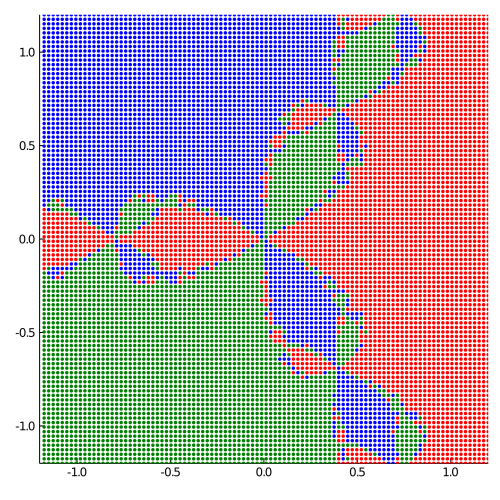

In [112]:
plot(leg=false, size=(500,500), ratio=1)
cores = [:red, :blue, :green]
for i = 1:3
    I = findall(R .== i)
    pontos = L[I]
    scatter!(getindex.(pontos, 1), getindex.(pontos, 2), c=cores[i], m=(2,stroke(0)))
end
xlims!(-1.2, 1.2)
ylims!(-1.2, 1.2)

In [87]:
getindex.(L[I], 2)

10-element Array{Float64,1}:
  0.0828413482900036
 -0.013485387193052173
  0.029733585084941616
 -0.010901738508171745
  0.15743302021369893
 -0.07628038164104582
  0.08116296225068749
 -0.018757268194516008
 -0.24807927306599403
  0.021969346754254097